# Project: Investigate TMDb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
# Remove unnecessary columns
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'overview'], axis = 1, inplace = True)
df.head(1)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [4]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


##### Minimum value of budget, revenue, runtime, budget_adj and revenue_adj are 0. Considering the nature of these data, these 0 should be treated as a missing value.

In [5]:
# Check datatype and missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
keywords                9373 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(5), object(7)
memory usage: 1.3+ MB


In [6]:
print(f'There are {df.shape[1]} columns and {df.shape[0]} rows.')

There are 16 columns and 10866 rows.


In [7]:
# count missing value
df.isna().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
keywords                1493
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [8]:
# Check duplicated value
df.duplicated().sum()

1

##### There is one duplicated row.

## Data Cleaning 
### Treat 0 as missing value in certain columns

In [9]:
cols = ['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']
df[cols] = df[cols].replace({0:np.nan})

In [10]:
df.isna().sum()

popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
director                  44
keywords                1493
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj              5696
revenue_adj             6016
dtype: int64

##### Now there are much more missing values. To make the most of this dataset, I will drop missing value only when necessary.

### Remove duplicated rows

In [11]:
# Check duplicated row
df[df.duplicated()]

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,30000000.0,967000.0,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,martial arts|dystopia|based on video game|mart...,92.0,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [12]:
### delete duplicated
df.drop_duplicates(inplace = True)
df.shape

(10865, 16)

##### Now the duplicated row is deleted and the number of rows is 10865.

<a id='eda'></a>
## Exploratory Data Analysis - What kinds of properties have influence on the vote average?



### Does released year have any influence on the avarage vote?
> Has overall film quality been changed? Are people tend to grade generously to older films? 
Also, given the fact that TMDb started in 2008, it might be possible that regarding the older films especially the one released before 2008, more major/popular films are tend to be registered. 


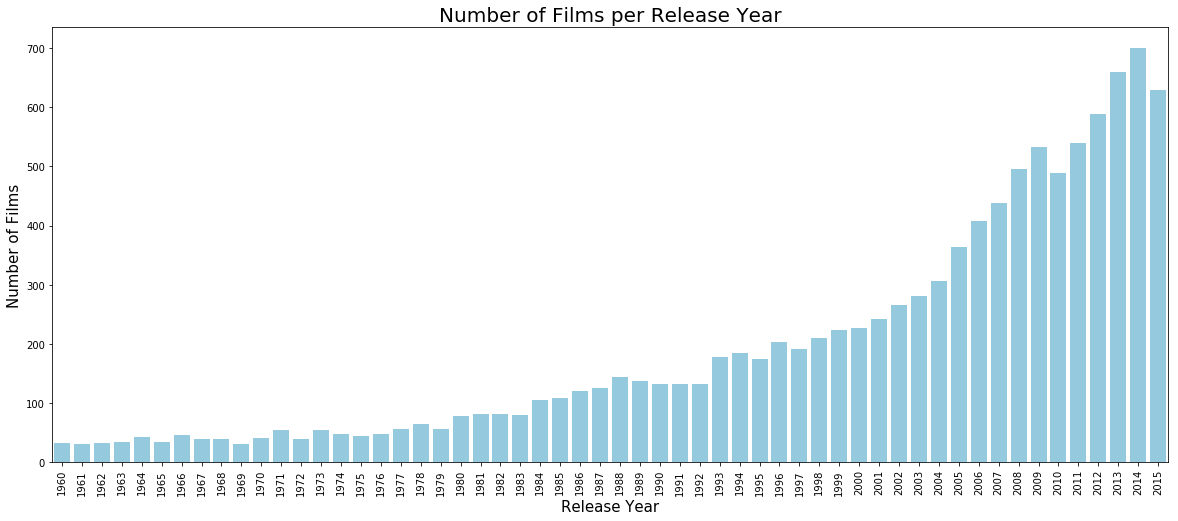

In [13]:
# Plot the number of films per realese year
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.countplot(data = df, x = 'release_year', color = 'skyblue')
ax.set_xlabel('Release Year', fontsize = 15)
ax.set_ylabel('Number of Films', fontsize = 15)
ax.set_title('Number of Films per Release Year', fontsize = 20)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

##### Overoll, the number of registered film keeps increasing. 

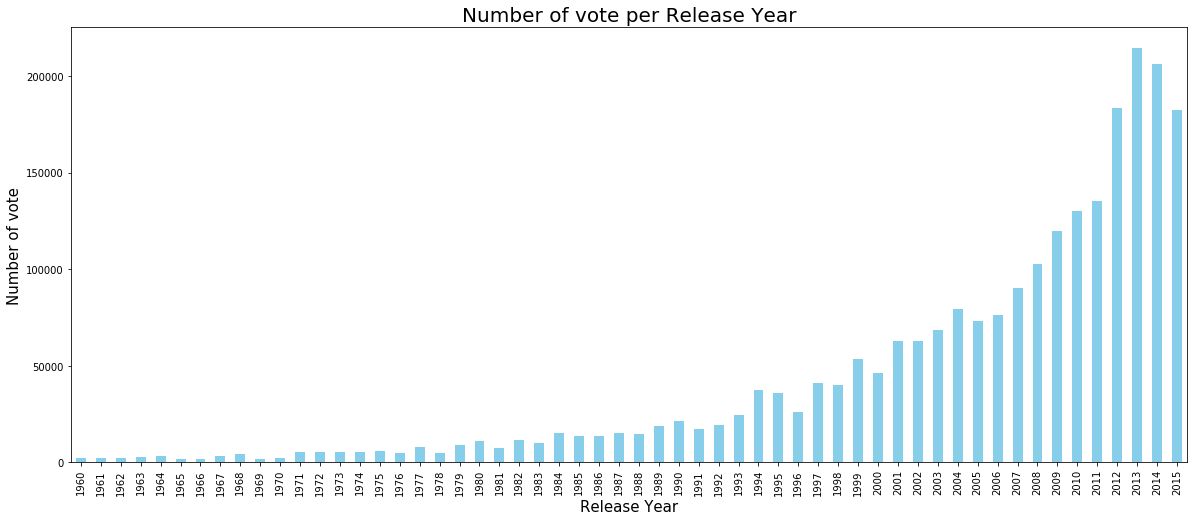

In [14]:
# Plot the number of vote per realese year
df.groupby('release_year').sum().vote_count.plot(kind='bar', figsize = (20,8), color = 'skyblue')
plt.xlabel('Release Year', fontsize = 15)
plt.ylabel('Number of vote', fontsize = 15)
plt.title('Number of vote per Release Year', fontsize = 20);

##### Overall, the number of vote is also increasing.

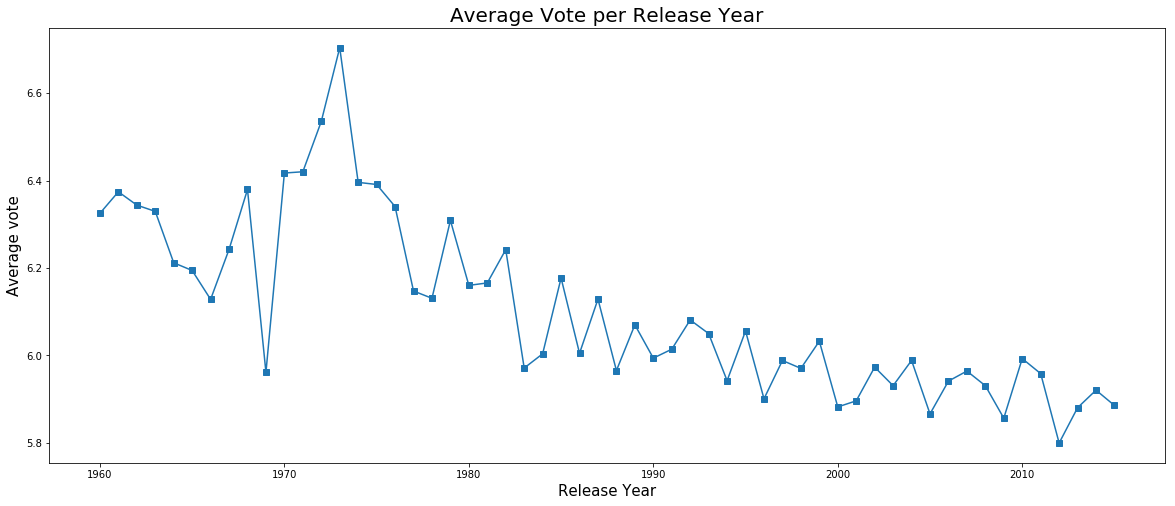

In [15]:
# Plot the avarae vote per realese year
df.groupby('release_year').mean().vote_average.plot(kind='line', figsize = (20,8), marker = 's')
plt.xlabel('Release Year', fontsize = 15)
plt.ylabel('Average vote', fontsize = 15)
plt.title('Average Vote per Release Year', fontsize = 20);

##### Overoll, the vote avarage looks slightly decreasing, while the number of the film and vote are increasing.
##### I'd like to check correlation coefficience between vote avarage and release year.

In [16]:
# Find the correlation coefficient
df_year = df.groupby('release_year').sum().vote_count.to_frame(name = 'number_of_vote').reset_index()

In [17]:
df_year['number_of_title'] = df.groupby('release_year').count().original_title.to_frame(name = 'number_of_title').reset_index().iloc[:,1]

In [18]:
df_year['average_vote'] = df.groupby('release_year').mean().vote_average.to_frame(name = 'average_vote').reset_index().iloc[:,1]

In [19]:
df_year.head()

,release_year,number_of_vote,number_of_title,average_vote
0,1960,2481,32,6.325000
1,1961,2405,31,6.374194
2,1962,2392,32,6.343750
3,1963,2816,34,6.329412
4,1964,3137,42,6.211905


In [20]:
df_year.corr()

,release_year,number_of_vote,number_of_title,average_vote
release_year,1.000000,0.828635,0.890582,-0.798732
number_of_vote,0.828635,1.000000,0.978191,-0.616217
number_of_title,0.890582,0.978191,1.000000,-0.682063
average_vote,-0.798732,-0.616217,-0.682063,1.000000


##### Release year and the number of vote / registered films show highly positive correlation.
##### On the other hand, the average vote and release year show highly negative correlation.

### Does Genre have any influence on the vote avarage?

In [21]:
# Make a function to make one data per column by expanding rows
def expand(df, col):
    if type(col) != str:
        raise TypeError('col must be string')
    else:
        return df.drop(col, axis=1).join(df[col].str.split('|', expand = True).stack().rename(col).reset_index(drop = True))

In [22]:
# Make a new data frame with one genres per row 
df_genre = expand(df, 'genres')
df_genre.head(3)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Adventure
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Science Fiction


In [23]:
# Check unique values
df_genre['genres'].nunique()

20

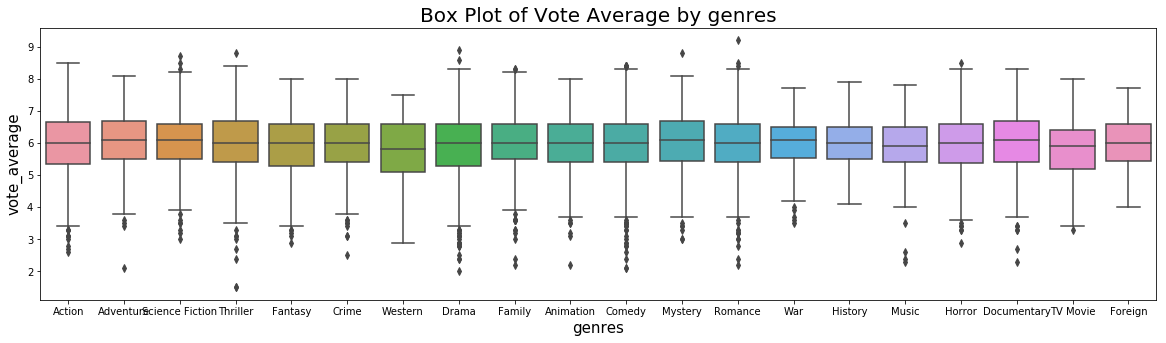

In [24]:
# Plot the vote avarage by genres
plt.figure(figsize=(20,5))
sns.boxplot(df_genre.genres, df_genre.vote_average)
plt.title('Box Plot of Vote Average by genres', fontsize = 20)
plt.xlabel('genres', fontsize = 15)
plt.ylabel('vote_average', fontsize = 15)
plt.savefig('boxplot2.png')
plt.show()

In [36]:
# Check descriptive statistics of appearance by genre
df_genre.groupby('genres').count().sort_values(by = 'original_title', ascending = False).original_title.describe()

count      20.000000
mean      543.250000
std       504.729618
min        39.000000
25%       144.250000
50%       425.000000
75%       668.250000
max      1924.000000
Name: original_title, dtype: float64

##### At least every genres have 39 films or more.

In [25]:
# Check descriptive statistics of vote average by genre
df_genre.groupby('genres').mean().describe().vote_average

count    20.000000
mean      5.960122
std       0.081145
min       5.700000
25%       5.942717
50%       5.974169
75%       6.007238
max       6.068783
Name: vote_average, dtype: float64

In [26]:
# Check variance
statistics.variance(df_genre.groupby('genres').mean().vote_average)

0.006584585620155093

##### The difference between each genres looks relatively small.
##### In order to check the correlation coefficient between vote average and each genres, I will make a new dataset by one hot encoding.

In [27]:
df_genre_dummy = pd.get_dummies(df_genre, columns = ['genres'])

In [28]:
df_genre_dummy.head(1)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,production_companies,release_date,...,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science Fiction,genres_TV Movie,genres_Thriller,genres_War,genres_Western
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_genre_dummy.iloc[:, 15:].head(1)

,genres_Action,genres_Adventure,genres_Animation,genres_Comedy,genres_Crime,genres_Documentary,genres_Drama,genres_Family,genres_Fantasy,genres_Foreign,genres_History,genres_Horror,genres_Music,genres_Mystery,genres_Romance,genres_Science Fiction,genres_TV Movie,genres_Thriller,genres_War,genres_Western
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# Check correlation coefficient
df_genre_dummy.iloc[:, 15:].corrwith(df_genre_dummy['vote_average']).sort_values( ascending= False)

genres_Adventure          0.023530
genres_Thriller           0.018102
genres_Science Fiction    0.016572
genres_Documentary        0.007596
genres_Action             0.007525
genres_Mystery            0.005895
genres_History            0.004005
genres_War                0.003292
genres_Family             0.001275
genres_Comedy             0.001124
genres_Animation         -0.000818
genres_Foreign           -0.001056
genres_Romance           -0.004088
genres_Fantasy           -0.004592
genres_Horror            -0.008321
genres_Crime             -0.008788
genres_TV Movie          -0.011877
genres_Music             -0.013287
genres_Western           -0.017652
genres_Drama             -0.027852
dtype: float64

##### Adventure film has hiest correlation with vote avarage, but overall correlation between genres and vote average is not so strong.

### Do cast have any influence on the vote avarage?

In [31]:
# Make a new dataframe with one cast per row
df_cast = expand(df, 'cast')
df_cast.head(3)

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Bryce Dallas Howard
2,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Irrfan Khan


In [32]:
# Check unique values of cast
df_cast['cast'].nunique()

6433

In [33]:
# Check descriptive statistics of appearance by cast
df_cast.groupby('cast').count().sort_values(by = 'original_title', ascending = False).original_title.describe()

count    6433.000000
mean        1.688948
std         1.524193
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        14.000000
Name: original_title, dtype: float64

##### More than 50% of the cast has only 1 appearance.

In [34]:
# Check descriptive statistics of vote avarage by cast
df_cast.groupby('cast').mean().describe().vote_average

count    6433.000000
mean        5.970462
std         0.850914
min         2.000000
25%         5.500000
50%         6.000000
75%         6.500000
max         9.200000
Name: vote_average, dtype: float64

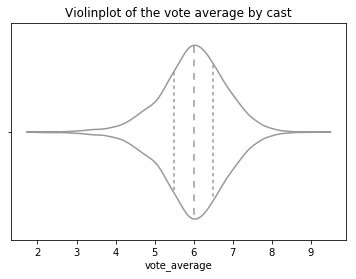

In [66]:
ax = sns.violinplot(df_cast.groupby('cast').mean().vote_average, inner = 'quartile', color = 'white')
ax.set_title('Violinplot of the vote average by cast');

##### Vote average has big difference. I'd like to focus on the casts with many appearance to futher analise as most of the casts has only 1 or 2 appearance.

In [37]:
# Make a dataframe grouped by cast
df_cast_count = df_cast.groupby('cast').count().sort_values(by = 'original_title', ascending = False)

In [38]:
df_cast_count.head(3)

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
cast,,,,,,,,,,,,,,,
Justin Long,14,6,7,14,14,13,14,14,12,14,14,14,14,6,7
Liam Neeson,14,7,8,14,14,13,14,14,12,14,14,14,14,7,8
James Franco,12,5,7,12,12,10,12,12,12,12,12,12,12,5,7


In [39]:
df_cast_clearn = df_cast.groupby('cast').count().original_title.to_frame(name = 'number_of_title').reset_index()

In [40]:
df_cast_clearn['vote_average'] = df_cast.groupby('cast').mean().vote_average.to_frame(name = 'vote_average').reset_index().iloc[:,1]

In [41]:
df_cast_clearn.head(3)

,cast,number_of_title,vote_average
0,50 Cent,3,6.40
1,A Martinez,1,5.50
2,AJ Bowen,2,5.85


In [43]:
df_cast_clearn.sort_values(by = 'number_of_title', ascending = False).head(3)

,cast,number_of_title,vote_average
3327,Justin Long,14,6.021429
3821,Liam Neeson,14,6.378571
2648,James Franco,12,6.283333


In [47]:
# Make a function to make a dataframe and the cast list of the casts appeared more than N times
def top_cast(n):
    cast_top = list(df_cast_count[df_cast_count['original_title'] >= n].index)
    return df_cast[df_cast['cast'].isin(cast_top)].reset_index(drop = True), cast_top

In [49]:
# Make a dataframe of film with casts appeared in more than 10 films
df_cast10, list_cast10 = top_cast(10)

In [50]:
df_cast10.head(3)

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,cast
0,3.644541,58000000.0,150170815.0,Goosebumps,Rob Letterman,based on novel|magic|fantasy|family|3d,103.0,Adventure|Horror|Comedy,Columbia Pictures|Original Film|Scholastic Ent...,8/5/15,600,6.2,2015,5.335998e+07,1.381571e+08,J.K. Simmons
1,3.358321,NaN,22354572.0,Solace,Afonso Poyart,thriller|serial killer|psychic|fbi agent|intrigue,101.0,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,NaN,2.056620e+07,Jessica Chastain
2,3.339135,175000000.0,331926147.0,The Good Dinosaur,Peter Sohn,tyrannosaurus rex|friends|animation|alternate ...,93.0,Adventure|Animation|Comedy|Family|Fantasy,Walt Disney Pictures|Pixar Animation Studios|B...,11/14/15,1087,6.6,2015,1.609999e+08,3.053719e+08,Kristen Wiig


In [51]:
list_cast10

['Justin Long',
 'Liam Neeson',
 'James Franco',
 'Samuel L. Jackson',
 'Nicolas Cage',
 'Kristen Wiig',
 'Sam Rockwell',
 'Brendan Gleeson',
 'Jessica Chastain',
 'Robert De Niro',
 'Bradley Cooper',
 'Alfred Molina',
 'Ben Kingsley',
 'James Marsden',
 'Danny Trejo',
 'Bill Nighy',
 'Jason Bateman',
 'Ron Perlman',
 'Jesse Eisenberg',
 'Seth Rogen',
 'Michael Fassbender',
 'Julianne Moore',
 'Sam Worthington',
 'Anna Kendrick',
 'Rosario Dawson',
 'Kristen Stewart',
 'Rachel McAdams',
 'Joseph Gordon-Levitt',
 'Danny Glover',
 'Colin Farrell',
 'Ray Liotta',
 'J.K. Simmons',
 'Amanda Seyfried',
 'ChloÃ« Grace Moretz',
 'Adrien Brody']

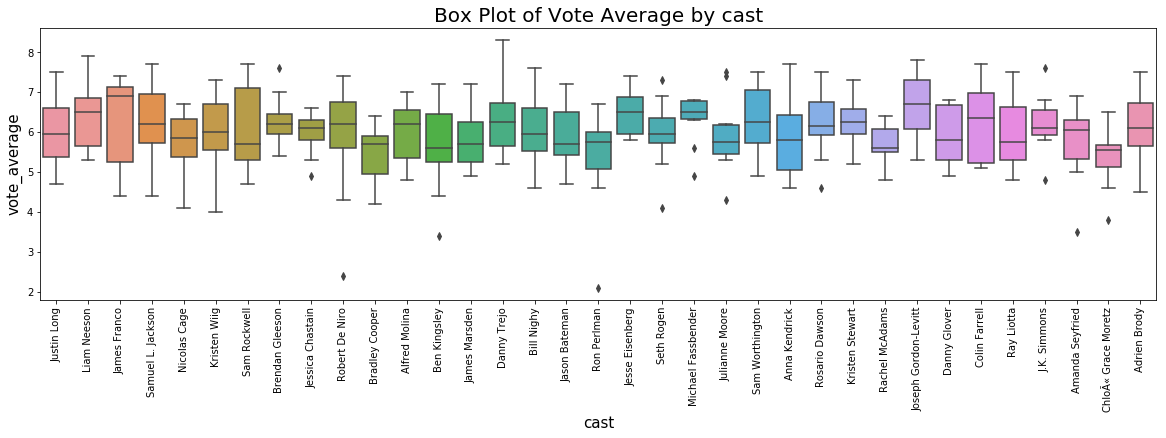

In [52]:
# Plot the vote avarage by cast in descending order of the appearance from the left.
plt.figure(figsize=(20,5))
sns.boxplot(df_cast10.cast, df_cast10.vote_average, order = list_cast10)
plt.title('Box Plot of Vote Average by cast', fontsize = 20)
plt.xlabel('cast', fontsize = 15)
plt.ylabel('vote_average', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

##### There are a significant difference.

In [53]:
df_cast10.vote_average.describe()

count    373.000000
mean       6.016622
std        0.892557
min        2.100000
25%        5.400000
50%        6.000000
75%        6.600000
max        8.300000
Name: vote_average, dtype: float64

In [54]:
# Check variance of top 10
statistics.variance(df_cast10.groupby('cast').mean().vote_average)

0.08794145316528812

In [55]:
df_cast10_dummy = pd.get_dummies(df_cast10, columns = ['cast'])

In [57]:
df_cast10_dummy.head(3)

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,...,cast_Nicolas Cage,cast_Rachel McAdams,cast_Ray Liotta,cast_Robert De Niro,cast_Ron Perlman,cast_Rosario Dawson,cast_Sam Rockwell,cast_Sam Worthington,cast_Samuel L. Jackson,cast_Seth Rogen
0,3.644541,58000000.0,150170815.0,Goosebumps,Rob Letterman,based on novel|magic|fantasy|family|3d,103.0,Adventure|Horror|Comedy,Columbia Pictures|Original Film|Scholastic Ent...,8/5/15,...,0,0,0,0,0,0,0,0,0,0
1,3.358321,NaN,22354572.0,Solace,Afonso Poyart,thriller|serial killer|psychic|fbi agent|intrigue,101.0,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,...,0,0,0,0,0,0,0,0,0,0
2,3.339135,175000000.0,331926147.0,The Good Dinosaur,Peter Sohn,tyrannosaurus rex|friends|animation|alternate ...,93.0,Adventure|Animation|Comedy|Family|Fantasy,Walt Disney Pictures|Pixar Animation Studios|B...,11/14/15,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df_cast10_dummy.iloc[:, 15:].head(3)
# Cast list starts from column 15.

,cast_Adrien Brody,cast_Alfred Molina,cast_Amanda Seyfried,cast_Anna Kendrick,cast_Ben Kingsley,cast_Bill Nighy,cast_Bradley Cooper,cast_Brendan Gleeson,cast_ChloÃ« Grace Moretz,cast_Colin Farrell,...,cast_Nicolas Cage,cast_Rachel McAdams,cast_Ray Liotta,cast_Robert De Niro,cast_Ron Perlman,cast_Rosario Dawson,cast_Sam Rockwell,cast_Sam Worthington,cast_Samuel L. Jackson,cast_Seth Rogen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# Find the correlation coefficient between casts and vote average
cast_coef = df_cast10_dummy.iloc[:, 15:].corrwith(df_cast10_dummy['vote_average']).sort_values( ascending= False)

In [90]:
cast_coef

cast_Joseph Gordon-Levitt    0.112353
cast_Jesse Eisenberg         0.090008
cast_Liam Neeson             0.080188
cast_Danny Trejo             0.063939
cast_Michael Fassbender      0.058353
cast_James Franco            0.054554
cast_Brendan Gleeson         0.053641
cast_Sam Worthington         0.047180
cast_Samuel L. Jackson       0.040918
cast_Kristen Stewart         0.036008
cast_J.K. Simmons            0.036008
cast_Colin Farrell           0.034146
cast_Rosario Dawson          0.028560
cast_Sam Rockwell            0.019861
cast_Adrien Brody            0.008077
cast_Kristen Wiig            0.007416
cast_Justin Long             0.001065
cast_Bill Nighy              0.000629
cast_Jason Bateman          -0.008681
cast_Jessica Chastain       -0.012140
cast_Seth Rogen             -0.012405
cast_Alfred Molina          -0.013918
cast_Julianne Moore         -0.016130
cast_Ray Liotta             -0.017992
cast_Danny Glover           -0.019854
cast_Anna Kendrick          -0.027302
cast_Robert 

In [106]:
np.absolute(cast_coef).describe()

count    35.000000
mean      0.044402
std       0.034411
min       0.000629
25%       0.017061
50%       0.036008
75%       0.059586
max       0.118543
dtype: float64

##### The difference is relatively low and correlation is weak. 

### Do directors have any influence on the vote avarage?

In [61]:
# Check the number of the unique values 
df['director'].nunique()

5067

In [62]:
# Find Check descriptive statistics of number of films by director
df.groupby('director').count().sort_values(by = 'original_title', ascending = False).original_title.describe()

count    5067.000000
mean        2.135583
std         2.528006
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        45.000000
Name: original_title, dtype: float64

##### Most of the director have only 1 film.

In [63]:
# Check descriptive statistics of vote avarage by director
df.groupby('director').mean().describe().vote_average

count    5067.000000
mean        5.892041
std         0.925625
min         1.500000
25%         5.350000
50%         5.950000
75%         6.500000
max         9.200000
Name: vote_average, dtype: float64

In [64]:
# Check variance of top 10
statistics.variance(df.groupby('director').mean().vote_average)

0.8567823598469511

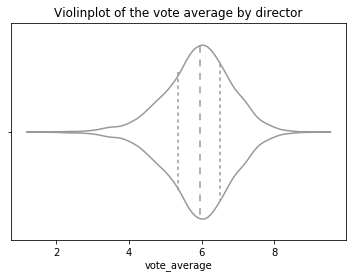

In [65]:
ax = sns.violinplot(df.groupby('director').mean().vote_average, inner = 'quartile', color = 'white')
ax.set_title('Violinplot of the vote average by director');

In [67]:
# Make a dataframe grouped by director
df_direct_count = df.groupby('director').count().sort_values(by = 'original_title', ascending = False)

In [68]:
df_direct_count.head(3)

,popularity,budget,revenue,original_title,cast,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
director,,,,,,,,,,,,,,,
Woody Allen,45,25,22,45,45,43,45,45,42,45,45,45,45,25,22
Clint Eastwood,34,24,26,34,34,33,34,34,34,34,34,34,34,24,26
Martin Scorsese,29,21,18,29,28,28,29,29,26,29,29,29,29,21,18


In [69]:
df_director_clearn= df.groupby('director')['original_title'].count().to_frame(name = 'number_of_title').reset_index()

In [71]:
df_director_clearn.head(3)

,director,number_of_title
0,FrÃ©dÃ©ric Jardin,1
1,A. Todd Smith,1
2,A.R. Murugadoss,1


In [72]:
df_director_clearn['vote_average'] = df.groupby('director').mean().vote_average.to_frame(name = 'vote_average').reset_index().iloc[:,1]

In [74]:
df_director_clearn.sort_values(by = 'number_of_title', ascending = False).head()

,director,number_of_title,vote_average
4999,Woody Allen,45,6.444444
878,Clint Eastwood,34,6.508824
3175,Martin Scorsese,29,6.958621
4601,Steven Spielberg,29,6.824138
4033,Ridley Scott,23,6.478261


In [75]:
# Make a function to make a dataframe and the cast list of the casts appeared more thanN times
def top_direct(n):
    direct_top = list(df_direct_count[df_direct_count['original_title'] >= n].index)
    return df[df['director'].isin(direct_top)].reset_index(drop = True), direct_top

In [76]:
# Make a dataframe of film with casts appeared in more than 15 films
df_director15, list_director15 = top_direct(15)

In [77]:
df_director15.head(3)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,7.667400,108000000.0,595380321.0,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
1,3.648210,40000000.0,162610473.0,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,Steven Spielberg,spy|cia|cold war|pilot|lawyer,141.0,Thriller|Drama,DreamWorks SKG|Amblin Entertainment|Studio Bab...,10/15/15,1638,7.1,2015,3.679998e+07,1.496016e+08
2,2.345821,100000000.0,93820758.0,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,suicide|ocean|sea|hunger|shipwreck,122.0,Thriller|Drama|Adventure|Action|History,Imagine Entertainment|Spring Creek Productions...,11/20/15,805,6.4,2015,9.199996e+07,8.631506e+07


In [78]:
list_director15

['Woody Allen',
 'Clint Eastwood',
 'Martin Scorsese',
 'Steven Spielberg',
 'Ridley Scott',
 'Ron Howard',
 'Steven Soderbergh',
 'Joel Schumacher',
 'Brian De Palma',
 'Tim Burton',
 'Wes Craven',
 'Barry Levinson',
 'Mike Nichols',
 'Rob Reiner',
 'David Cronenberg',
 'John Carpenter',
 'Francis Ford Coppola',
 'Norman Jewison',
 'Sidney Lumet',
 'Walter Hill',
 'Renny Harlin',
 'Peter Hyams',
 'Robert Zemeckis',
 'Oliver Stone',
 'Tyler Perry',
 'Spike Lee',
 'Stephen Frears',
 'Uwe Boll',
 'Richard Linklater',
 'Stephen Herek',
 'Blake Edwards',
 'Richard Donner',
 'Roman Polanski',
 'John Landis',
 'Tony Scott',
 'Neil Jordan',
 'David Lynch',
 'Ivan Reitman',
 'Robert Altman',
 'Gus Van Sant']

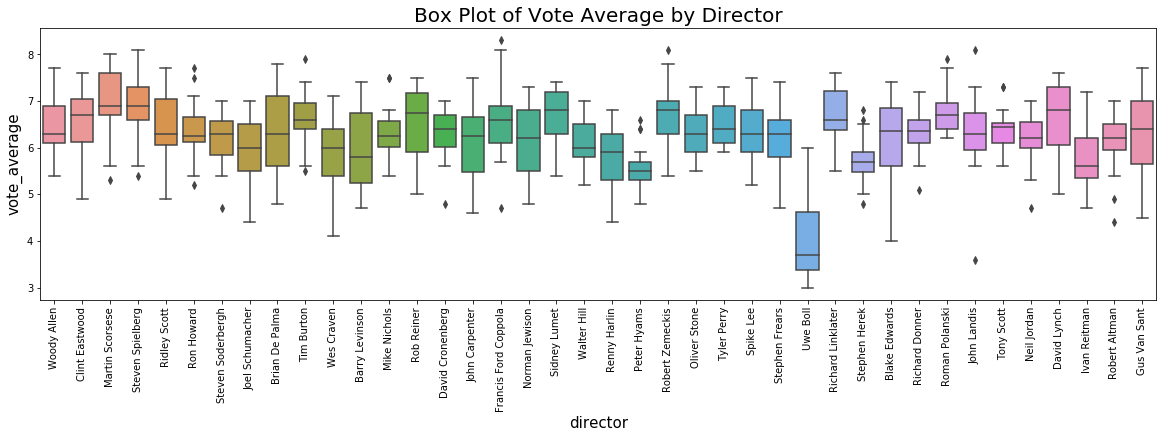

In [79]:
# Plot the vote avarage by cast in descending order of the appearance from the left.
plt.figure(figsize=(20,5))
sns.boxplot(df_director15.director, df_director15.vote_average, order = list_director15)
plt.title('Box Plot of Vote Average by Director', fontsize = 20)
plt.xlabel('director', fontsize = 15)
plt.ylabel('vote_average', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

In [80]:
df_director15.vote_average.describe()

count    764.000000
mean       6.286126
std        0.817384
min        3.000000
25%        5.800000
50%        6.350000
75%        6.800000
max        8.300000
Name: vote_average, dtype: float64

In [81]:
# Check variance
statistics.variance(df_director15.groupby('director').mean().vote_average)

0.22321169908791527

In [82]:
# Check correlation coefficient
df_director15_dummy = pd.get_dummies(df_director15, columns = ['director'])

In [83]:
df_director15_dummy.head(3)

,popularity,budget,revenue,original_title,cast,keywords,runtime,genres,production_companies,release_date,...,director_Stephen Herek,director_Steven Soderbergh,director_Steven Spielberg,director_Tim Burton,director_Tony Scott,director_Tyler Perry,director_Uwe Boll,director_Walter Hill,director_Wes Craven,director_Woody Allen
0,7.667400,108000000.0,595380321.0,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,based on novel|mars|nasa|isolation|botanist,141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,...,0,0,0,0,0,0,0,0,0,0
1,3.648210,40000000.0,162610473.0,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,spy|cia|cold war|pilot|lawyer,141.0,Thriller|Drama,DreamWorks SKG|Amblin Entertainment|Studio Bab...,10/15/15,...,0,0,1,0,0,0,0,0,0,0
2,2.345821,100000000.0,93820758.0,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,suicide|ocean|sea|hunger|shipwreck,122.0,Thriller|Drama|Adventure|Action|History,Imagine Entertainment|Spring Creek Productions...,11/20/15,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df_director15_dummy.iloc[:, 15:].head()

,director_Barry Levinson,director_Blake Edwards,director_Brian De Palma,director_Clint Eastwood,director_David Cronenberg,director_David Lynch,director_Francis Ford Coppola,director_Gus Van Sant,director_Ivan Reitman,director_Joel Schumacher,...,director_Stephen Herek,director_Steven Soderbergh,director_Steven Spielberg,director_Tim Burton,director_Tony Scott,director_Tyler Perry,director_Uwe Boll,director_Walter Hill,director_Wes Craven,director_Woody Allen
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [87]:
director_coef = df_director15_dummy.iloc[:, 15:].corrwith(df_director15_dummy['vote_average']).sort_values( ascending= False)

In [104]:
director_coef

director_Martin Scorsese         0.163532
director_Steven Spielberg        0.130830
director_Roman Polanski          0.090889
director_Robert Zemeckis         0.077521
director_Sidney Lumet            0.073176
director_Richard Linklater       0.070746
director_Tim Burton              0.069596
director_Francis Ford Coppola    0.061226
director_Clint Eastwood          0.058837
director_David Lynch             0.052068
director_Woody Allen             0.048488
director_Rob Reiner              0.044897
director_Ridley Scott            0.041440
director_Tyler Perry             0.034067
director_Ron Howard              0.019214
director_Tony Scott              0.015913
director_Brian De Palma          0.013824
director_Oliver Stone            0.011253
director_Mike Nichols            0.010034
director_Richard Donner          0.003603
director_David Cronenberg        0.002638
director_Spike Lee               0.001476
director_John Landis            -0.003111
director_Gus Van Sant           -0

In [105]:
np.absolute(director_coef).describe() 

count    40.000000
mean      0.058580
std       0.066703
min       0.001476
25%       0.020325
50%       0.043168
75%       0.074262
max       0.392539
dtype: float64

##### There are some director who has relatvely high correlation.

In [107]:
np.absolute(cast_coef).describe()

count    35.000000
mean      0.044402
std       0.034411
min       0.000629
25%       0.017061
50%       0.036008
75%       0.059586
max       0.118543
dtype: float64

##### Overall, the director tends to give higher influence on the vote average.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

##### Overall, the number of the released films by year has been increasing in TMDb, although we cannot rule out only with this dataset that the actual number of the released films are .